# EDA by Naba

 install/import all important libraries first of all 

## Composition of Titanic DataSet

In [2]:
# import all important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
# import or load the dataSet
df = sns.load_dataset('titanic')

In [4]:
# Data Composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# to see first five rows of our data we use head function .... ye dekhny k liye k ye actual mn b whi data type h ya niii jo hm ny composition mn dekhi hn mzeed columns ko hm mzeed achy se dekh skty hn iss se

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
# to check overall unique value in our data set
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [8]:
# to check a specific column unique value
df.survived.unique()

array([0, 1], dtype=int64)

In [9]:
# to check in survived column how many 0 and 1 are occurs 
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [10]:
# to see the whole columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [12]:
# to see maximum age
max(df['age'])

80.0

In [13]:
# create bin edges to make groups of different age persons

bins = [0,5,10,15,18,40,80]
labels = ['0-5','6-10','10-15','16-18','18-40','41-80']
# add new column
df['age_groups'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,18-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,18-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,18-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,18-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,18-40


In [14]:
df.age_groups.value_counts()

age_groups
18-40    425
41-80    150
16-18     56
0-5       44
6-10      20
10-15     19
Name: count, dtype: int64

In [15]:
# making the groups of male female and child
df.groupby('who')[['age_groups','class']].value_counts().unstack()

class             First  Second  Third
who   age_groups                      
child 0-5             3      13     28
      6-10            0       4     16
      10-15           3       2     14
      16-18           0       0      0
      18-40           0       0      0
      41-80           0       0      0
man   0-5             0       0      0
      6-10            0       0      0
      10-15           0       0      0
      16-18           2       6     23
      18-40          46      63    171
      41-80          50      21     31
woman 0-5             0       0      0
      6-10            0       0      0
      10-15           0       0      0
      16-18           8       4     13
      18-40          48      47     50
      41-80          26      13      9

In [16]:
# finding the maximum age where the who is child
df[df['who']=='child']['age'].max()

15.0

In [17]:
# making the groups of male female and child
df.groupby('who')[['survived','class']].value_counts().unstack()

class           First  Second  Third
who   survived                      
child 0             1       0     33
      1             5      19     25
man   0            77      91    281
      1            42       8     38
woman 0             2       6     58
      1            89      60     56

In [18]:
# making the groups of male female and child
df.groupby('who')[['age_groups','class','alone']].value_counts().unstack()

alone                    False  True 
who   age_groups class               
child 0-5        First       3      0
                 Second     13      0
                 Third      27      1
      6-10       First       0      0
                 Second      4      0
                 Third      16      0
      10-15      First       3      0
                 Second      2      0
                 Third       9      5
      16-18      First       0      0
                 Second      0      0
                 Third       0      0
      18-40      First       0      0
                 Second      0      0
                 Third       0      0
      41-80      First       0      0
                 Second      0      0
                 Third       0      0
man   0-5        First       0      0
                 Second      0      0
                 Third       0      0
      6-10       First       0      0
                 Second      0      0
                 Third       0      0
      10-15      First       0      0
                 Second      0      0
                 Third       0      0
      16-18      First       2      0
                 Second      0      6
                 Third       9     14
      18-40      First      21     25
                 Second     22     41
                 Third      26    145
      41-80      First      21     29
                 Second      5     16
                 Third       4     27
woman 0-5        First       0      0
                 Second      0      0
                 Third       0      0
      6-10       First       0      0
                 Second      0      0
                 Third       0      0
      10-15      First       0      0
                 Second      0      0
                 Third       0      0
      16-18      First       7      1
                 Second      2      2
                 Third       6      7
      18-40      First      26     22
                 Second     25     22
                 Third      26     24
      41-80      First      17      9
                 Second      7      6
                 Third       7      2

In [19]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_groups'],
      dtype='object')

## Data Visualization on titanic dataset

<Axes: xlabel='age_groups', ylabel='count'>

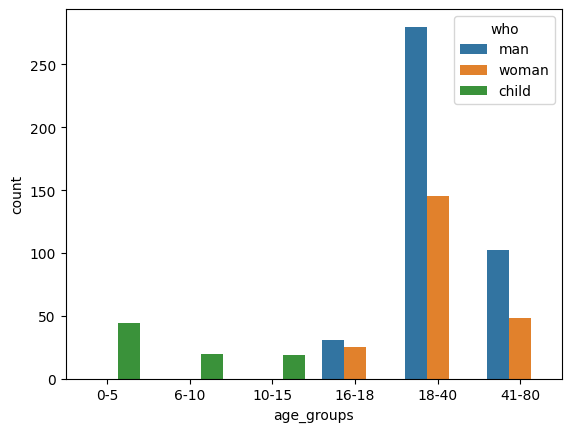

In [20]:
sns.countplot(df,x='age_groups',hue='who')

<Axes: xlabel='age', ylabel='fare'>

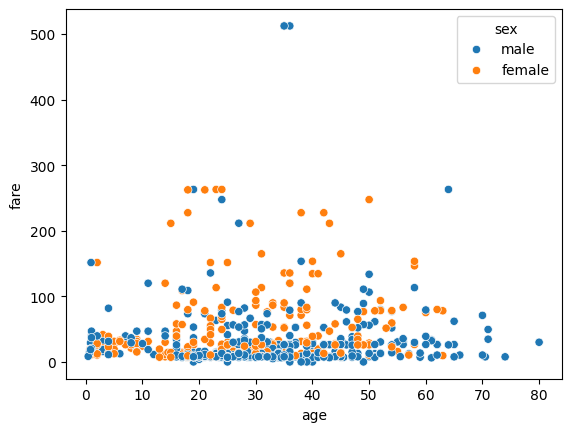

In [21]:
# scatterplot
sns.scatterplot(data=df,x='age',y='fare',hue='sex')

<Axes: xlabel='who', ylabel='fare'>

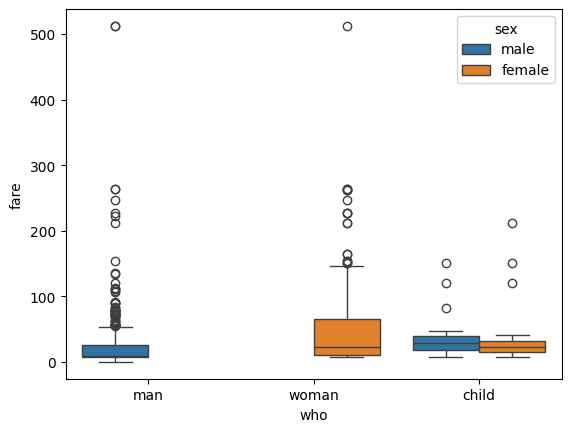

In [22]:
# boxplot
sns.boxplot(data=df,x='who',y='fare',hue='sex')

In [23]:
pip install plotly

In [24]:
pip install nbformate

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nbformate (from versions: none)
ERROR: No matching distribution found for nbformate


In [25]:
import plotly.express as px

fig = px.scatter(df,x='age',y='fare', color='sex')
fig.show()

In [26]:
fig = px.scatter(df,x='age',y='fare', color='who')
fig.show()

In [27]:
fig = px.box(df,x='survived',y='fare', color='sex')
fig.show()

## How we can check the relationship / Distribution 

<Axes: xlabel='age', ylabel='Count'>

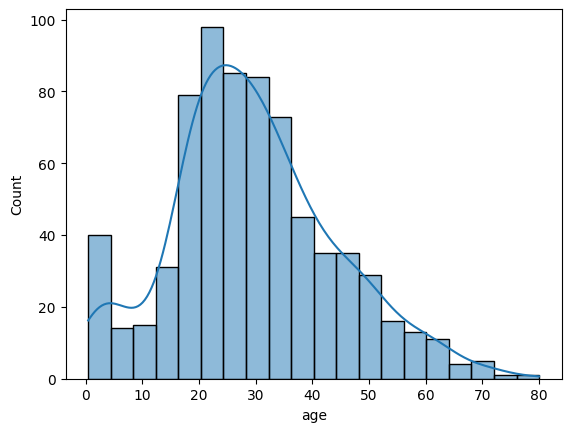

In [28]:
# distribution / normal distribution 
sns.histplot(df, x='age', kde=1)

<Axes: xlabel='fare', ylabel='Count'>

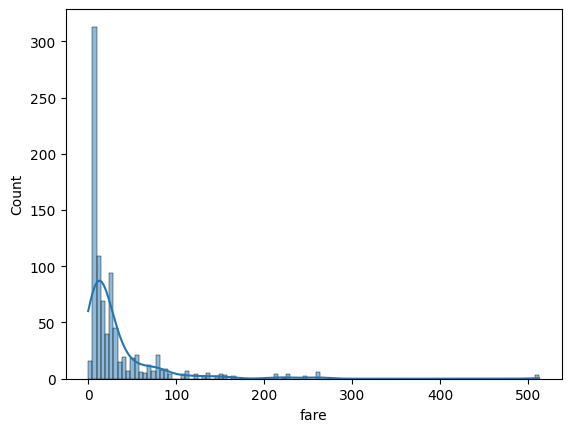

In [29]:
# distribution / normal distribution 
sns.histplot(df, x='fare',kde=1)

In [30]:
# applying the hypothsis test to check the normal distribution/normality of our data

# shapiro wilk test
from scipy.stats import shapiro
# removing / impute missing values
age_data = df['age'].dropna()
stat,p = shapiro(age_data)

print('stat',stat)
print('p',p)

# interpretation

alpha = 0.05
if p > alpha:
    print('sample distribution is normal / gaussian')
else:
    print('sample distribution is NOT normal / gaussian')

stat 0.981458306312561
p 7.340329943872348e-08
sample distribution is NOT normal / gaussian


<Axes: >

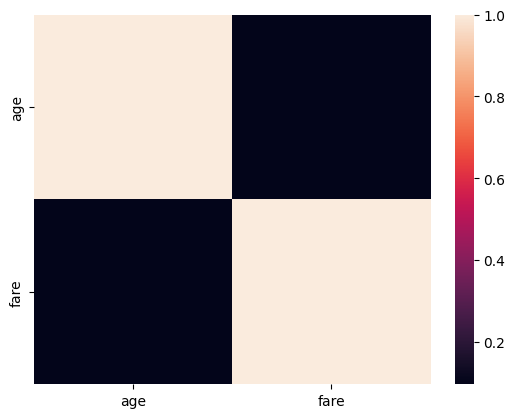

In [32]:
# Correlation Matrix

corr = df[['age','fare']].corr()

sns.heatmap(corr)

# impute null values in python

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
# Finding the null values
df.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
# Finding the null values method 2
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### removing methods

## method-1 dropna

In [42]:
# how to remove deck

df.drop(columns ='deck', inplace=True)

KeyError: "['deck'] not found in axis"

# method-2 fill na with mode 

In [43]:
# imputing null values of embark_town by taking mode 
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [45]:
# imputing null values of embarked by taking mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# method3-4 fill NA with mean or median

In [47]:
df['age'].fillna(df['age'].mean(), inplace=True)

df['age'].fillna(df['age'].median(), inplace=True)

df['age'].fillna(df['age'].mode()[0], inplace=True)

# method-5 replacing with a constant

In [ ]:
df['age'].fillna(value=29, inplace=True)

# method-6 interpolation (linear)

In [ ]:
df['age']= (df['age'].interpolate(method='linear'))

# method-7 KNN imputation

In [49]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbours=5)
df['age'] = imputer.fit_transform(df['age'])

# method-8 multivariate imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import iterativeimputer

imputer = iterativeimputer (max_iter = 10, random_state=0)
df['age'] = imputer.fit_transform(df['age'])